# Daytona SDK Examples

Load the Daytona SDK and create a sandbox

In [1]:
from daytona_sdk import Daytona, ChartType
from pprint import pp
import matplotlib.pyplot as plt
import io
import base64

from daytona_sdk import Daytona, SessionExecuteRequest

daytona = Daytona()

In [2]:
sandbox = daytona.create()

print(sandbox.id)

sandbox-068f0d1b


## Code and Command Execution

### Code Execution

In [ ]:
response = sandbox.process.code_run('print("Hello World!")')
if response.exit_code != 0:
    print(f"Error: {response.exit_code} {response.result}")
else:
    print(response.result)

### Command Execution

In [ ]:
response = sandbox.process.exec('echo "Hello World from exec!"', cwd="/home/daytona", timeout=10)
if response.exit_code != 0:
    print(f"Error: {response.exit_code} {response.result}")
else:
    print(response.result)

### Exec Sessions

Sessions can be used to execute multiple commands in a single shell that preserves context between commands.

In [ ]:
exec_session_id = "exec-session-1"
sandbox.process.create_session(exec_session_id)
session = sandbox.process.get_session(exec_session_id)
pp(session)
print()

# Execute the first command in the session
execCommand1 = sandbox.process.execute_session_command(exec_session_id, SessionExecuteRequest(command="export FOO=BAR"))
if execCommand1.exit_code != 0:
    print(f"Error: {execCommand1.exit_code} {execCommand1.output}")

# Get the command details
session_command = sandbox.process.get_session_command(exec_session_id, execCommand1.cmd_id)
pp(session_command)
print()

# Execute a second command in the session and see that the environment variable is set
execCommand2 = sandbox.process.execute_session_command(exec_session_id, SessionExecuteRequest(command="echo $FOO"))
if execCommand2.exit_code != 0:
    print(f"Error: {execCommand2.exit_code} {execCommand2.output}")
else:
    print(f"Output: {execCommand2.output}\n")

logs = sandbox.process.get_session_command_logs(exec_session_id, execCommand2.cmd_id)
print(f"Logs: {logs}")

### Charts

Daytona automatically detects any plots creations while running remote code and saves them in `response.artifacts.charts`. This feature is available only for **Matplotlib** plots.

exit_code=0 result="line: {'title': 'Line Chart', 'x_label': 'X-axis (seconds)', 'y_label': 'Y-axis (amplitude)', 'x_unit': 'seconds', 'y_unit': 'amplitude', 'x_scale': 'linear', 'y_scale': 'linear', 'x_ticks': [-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0], 'y_ticks': [-1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25], 'x_tick_labels': ['−2', '0', '2', '4', '6', '8', '10', '12'], 'y_tick_labels': ['−1.25', '−1.00', '−0.75', '−0.50', '−0.25', '0.00', '0.25', '0.50', '0.75', '1.00', '1.25'], 'type': 'line', 'elements': [{'label': '_child0', 'points': [[0.0, 0.0], [0.3448275862068966, 0.3380344178335103], [0.6896551724137931, 0.6362711974814501], [1.0344827586206897, 0.8595981763240232], [1.3793103448275863, 0.9817225101058533], [1.7241379310344829, 0.9882661953069056], [2.0689655172413794, 0.878458827488186], [2.413793103448276, 0.6652283029348345], [2.7586206896551726, 0.37367878506512486], [3.1034482758620694, 0.03813512843002494], [3.4482758620689657, -0.301898272335703]

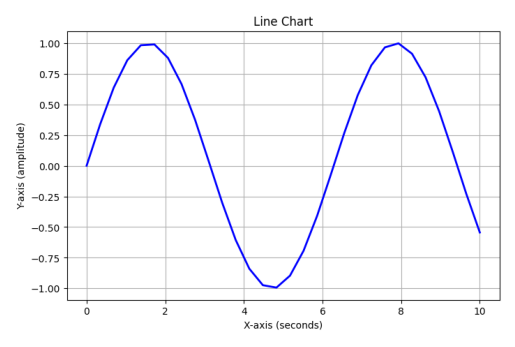

Type: ChartType.LINE
Title: Line Chart
X Labels: X-axis (seconds)
Y Labels: Y-axis (amplitude)
X Unit: None
Y Unit: None
X Ticks: [-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
X Tick Labels: ['−2', '0', '2', '4', '6', '8', '10', '12']
X Scale: linear
Y Ticks: [-1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25]
Y Tick Labels: ['−1.25', '−1.00', '−0.75', '−0.50', '−0.25', '0.00', '0.25', '0.50', '0.75', '1.00', '1.25']
Y Scale: linear
Elements:

	Label: _child0
	Points: [[0.0, 0.0], [0.3448275862068966, 0.3380344178335103], [0.6896551724137931, 0.6362711974814501], [1.0344827586206897, 0.8595981763240232], [1.3793103448275863, 0.9817225101058533], [1.7241379310344829, 0.9882661953069056], [2.0689655172413794, 0.878458827488186], [2.413793103448276, 0.6652283029348345], [2.7586206896551726, 0.37367878506512486], [3.1034482758620694, 0.03813512843002494], [3.4482758620689657, -0.301898272335703], [3.793103448275862, -0.6063884337819878], [4.137931034482759, -0.8394869669963327

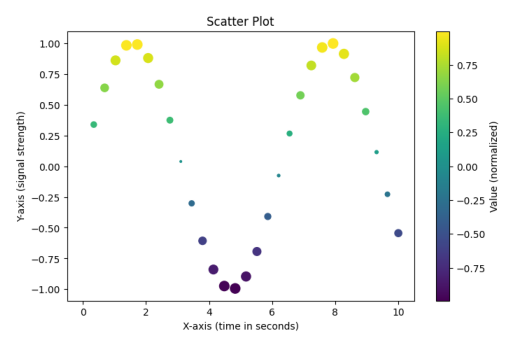

Type: ChartType.SCATTER
Title: Scatter Plot
X Labels: X-axis (time in seconds)
Y Labels: Y-axis (signal strength)
X Unit: None
Y Unit: None
X Ticks: [-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0]
X Tick Labels: ['−2', '0', '2', '4', '6', '8', '10', '12']
X Scale: linear
Y Ticks: [-1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25]
Y Tick Labels: ['−1.25', '−1.00', '−0.75', '−0.50', '−0.25', '0.00', '0.25', '0.50', '0.75', '1.00', '1.25']
Y Scale: linear
Elements:

	Label: Scatter 1
	Points: [[0.0, 0.0], [0.3448275862068966, 0.3380344178335103], [0.6896551724137931, 0.6362711974814501], [1.0344827586206897, 0.8595981763240232], [1.3793103448275863, 0.9817225101058533], [1.7241379310344829, 0.9882661953069056], [2.0689655172413794, 0.878458827488186], [2.413793103448276, 0.6652283029348345], [2.7586206896551726, 0.37367878506512486], [3.1034482758620694, 0.03813512843002494], [3.4482758620689657, -0.301898272335703], [3.793103448275862, -0.6063884337819878], [4.137931034482759

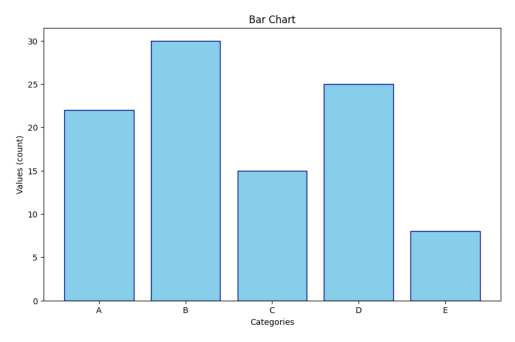

Type: ChartType.BAR
Title: Bar Chart
X Labels: Categories
Y Labels: Values (count)
X Unit: None
Y Unit: None
Elements:

	Label: A
	Group: default
	Value: 22.0

	Label: B
	Group: default
	Value: 30.0

	Label: C
	Group: default
	Value: 15.0

	Label: D
	Group: default
	Value: 25.0

	Label: E
	Group: default
	Value: 8.0


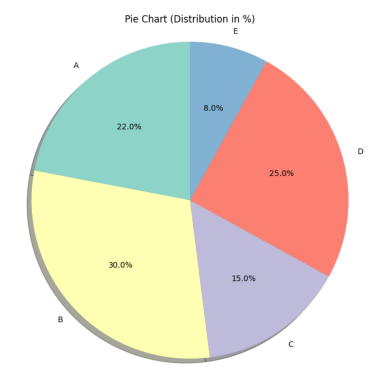

Type: ChartType.PIE
Title: Pie Chart (Distribution in %)
Elements:

	Label: A
	Angle: 79.19999694824219
	Radius: 1.0

	Label: 22.0%
	Angle: 107.99998474121094
	Radius: 1.0

	Label: B
	Angle: 54.0
	Radius: 1.0

	Label: 30.0%
	Angle: 90.0
	Radius: 1.0

	Label: C
	Angle: 28.800018310546875
	Radius: 1.0


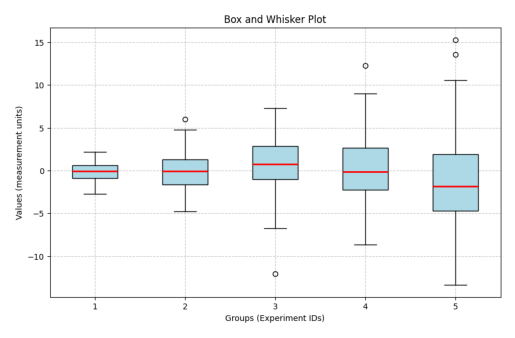

Type: ChartType.BOX_AND_WHISKER
Title: Box and Whisker Plot
X Labels: Groups (Experiment IDs)
Y Labels: Values (measurement units)
X Unit: None
Y Unit: None
Elements:

	Label: 1
	Min: -2.7161045518300653
	First Quartile: -1.38401022249881
	Median: -0.05191589316755476
	Third Quartile: 1.046704385995761
	Max: 2.1453246651590767
	Outliers: [6.001744104931008]

	Label: 2
	Min: -2.7161045518300653
	First Quartile: -1.3852513467120422
	Median: -0.05439814159401924
	Third Quartile: 1.0454632617825286
	Max: 2.1453246651590767
	Outliers: [6.001744104931008]

	Label: 3
	Min: -0.05191589316755476
	First Quartile: 0.35009564158539813
	Median: 0.752107176338351
	Third Quartile: -0.4455178237242431
	Max: -1.6431428237868373
	Outliers: [6.001744104931008]

	Label: 4
	Min: 1.259845439641828
	First Quartile: 0.572539043888807
	Median: -0.11476735186421393
	Third Quartile: -2.454579868226465
	Max: -4.794392384588716
	Outliers: [6.001744104931008]

	Label: 5
	Min: 4.744289822753226
	First Quartile: 1.44

In [3]:
sandbox.process.exec('pip install matplotlib numpy')

matplotlib_code = """
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 30)
y = np.sin(x)
categories = ['A', 'B', 'C', 'D', 'E']
values = [22, 30, 15, 25, 8]
box_data = [np.random.normal(0, std, 100) for std in range(1, 6)]

# 1. Line Chart
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Line Chart')
plt.xlabel('X-axis (seconds)')  # Added unit
plt.ylabel('Y-axis (amplitude)')  # Added unit
plt.grid(True)
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c=y, cmap='viridis', s=100*np.abs(y))
plt.colorbar(label='Value (normalized)')  # Added unit
plt.title('Scatter Plot')
plt.xlabel('X-axis (time in seconds)')  # Added unit
plt.ylabel('Y-axis (signal strength)')  # Added unit
plt.show()

# 3. Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue', edgecolor='navy')
plt.title('Bar Chart')
plt.xlabel('Categories')  # No change (categories don't have units)
plt.ylabel('Values (count)')  # Added unit
plt.show()

# 4. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', 
        colors=plt.cm.Set3.colors, shadow=True, startangle=90)
plt.title('Pie Chart (Distribution in %)')  # Modified title
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# 5. Box and Whisker Plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_data, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Box and Whisker Plot')
plt.xlabel('Groups (Experiment IDs)')  # Added unit
plt.ylabel('Values (measurement units)')  # Added unit
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
"""

response = sandbox.process.code_run(matplotlib_code)

print(response)

if response.exit_code != 0:
    print(f"Error: {response.exit_code} {response.result}")
else:
    for chart in response.artifacts.charts:
        img_data = base64.b64decode(chart.png)
        img = plt.imread(io.BytesIO(img_data))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print('Type:', chart.type)
        print('Title:', chart.title)

        if chart.type in [ChartType.LINE, ChartType.SCATTER, ChartType.BAR, ChartType.BOX_AND_WHISKER]:
            print('X Labels:', chart.x_label)
            print('Y Labels:', chart.y_label)
            print('X Unit:', chart.x_unit)
            print('Y Unit:', chart.y_unit)

        if chart.type in [ChartType.LINE, ChartType.SCATTER]:
            print('X Ticks:', chart.x_ticks)
            print('X Tick Labels:', chart.x_tick_labels)
            print('X Scale:', chart.x_scale)
            print('Y Ticks:', chart.y_ticks)
            print('Y Tick Labels:', chart.y_tick_labels)
            print('Y Scale:', chart.y_scale)
            print('Elements:')
            for element in chart.elements:
                print('\n\tLabel:', element.get('label', None))
                print('\tPoints:', element.get('points', None))
        elif chart.type == ChartType.BAR:
            print('Elements:')
            for bar in chart.elements:
                print('\n\tLabel:', bar.get('label', None))
                print('\tGroup:', bar.get('group', None))
                print('\tValue:', bar.get('value', None))
        elif chart.type == ChartType.PIE:
            print('Elements:')
            for element in chart.elements:
                print('\n\tLabel:', element.get('label', None))
                print('\tAngle:', element.get('angle', None))
                print('\tRadius:', element.get('radius', None))
        elif chart.type == ChartType.BOX_AND_WHISKER:
            print('Elements:')
            for element in chart.elements:
                print('\n\tLabel:', element.get('label', None))
                print('\tMin:', element.get('min', None))
                print('\tFirst Quartile:', element.get('first_quartile', None))
                print('\tMedian:', element.get('median', None))
                print('\tThird Quartile:', element.get('third_quartile', None))
                print('\tMax:', element.get('max', None))
                print('\tOutliers:', element.get('outliers', None))
            
            
            
            

Label: _child0
X Points: [ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
Y Points: [ 0.          0.33803442  0.6362712   0.85959818  0.98172251  0.9882662
  0.87845883  0.6652283   0.37367879  0.03813513 -0.30189827 -0.60638843
 -0.83948697 -0.9737506  -0.99337213 -0.89604148 -0.69321762 -0.40877952
 -0.07621478  0.26532292  0.57562349  0.81815446  0.96436206  0.9970329
  0.91232056  0.72019844  0.44328555  0.11418355 -0.22836157 -0.54402111]
----------------------------------------


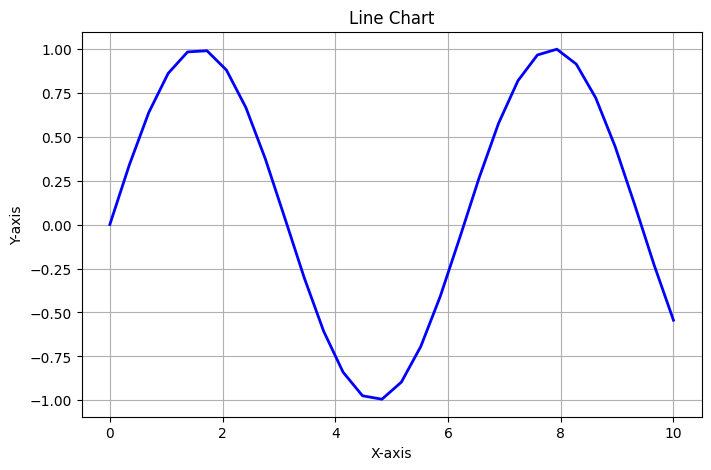

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 30)
y = np.sin(x)
categories = ['A', 'B', 'C', 'D', 'E']
values = [22, 30, 15, 25, 8]
box_data = [np.random.normal(0, std, 100) for std in range(1, 6)]

# 1. Line Chart
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Line Chart')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

# ✅ Extract data **before** plt.show()
ax = plt.gca()  # Get current axes
lines = ax.get_lines()  # Get all plotted lines

# Extract and print label names and belonging points
for line in lines:
    label = line.get_label()  # Get label (if set)
    x_data = line.get_xdata()  # Extract X points
    y_data = line.get_ydata()  # Extract Y points

    print(f"Label: {label if label else 'No Label'}")
    print("X Points:", x_data)
    print("Y Points:", y_data)
    print("-" * 40)  # Separator for readability

# ✅ Show the plot after extracting the data
plt.show()



## File System

- List Files
- Create Folder
- Upload File
- Download File
- Replace in Files
- Search Files
- Get File Info
- Move Files
- Delete File
- Set File Permissions

In [ ]:
# Get sandbox root directory
root_dir = sandbox.get_user_root_dir()

# List files in the sandbox
files = sandbox.fs.list_files(root_dir)
pp(files)

# Create a new directory in the sandbox
new_dir = os.path.join(root_dir, "new-dir")
sandbox.fs.create_folder(new_dir, "755")

file_path = os.path.join(new_dir, "data.txt")

# Add a new file to the sandbox
file_content = b"Hello, World!"
sandbox.fs.upload_file(file_path, file_content)

# Search for the file we just added
matches = sandbox.fs.find_files(root_dir, "World!")
pp(matches)

# Replace the contents of the file
sandbox.fs.replace_in_files([file_path], "Hello, World!", "Goodbye, World!")

# Read the file
downloaded_file = sandbox.fs.download_file(file_path)
print("File content:", downloaded_file.decode("utf-8"))

# Change the file permissions
sandbox.fs.set_file_permissions(file_path, mode="777")

# Get file info
file_info = sandbox.fs.get_file_info(file_path)
pp(file_info)  # Should show the new permissions

# Move the file to the new location
new_file_path = os.path.join(root_dir, "moved-data.txt")
sandbox.fs.move_files(file_path, new_file_path)

# Find the file in the new location
search_results = sandbox.fs.search_files(root_dir, "moved-data.txt")
pp(search_results)

# Delete the file
sandbox.fs.delete_file(new_file_path)

## Git

- Clone Repository
- Pull Repository
- List Branches
- Delete a Branch
- Create a Branch
- Checkout a Branch
- Git Log
- Git Status
- Git Add
- Git Commit

In [ ]:
root_dir = sandbox.get_user_root_dir()
project_dir = os.path.join(root_dir, "learn-typescript")

# Clone the repository
sandbox.git.clone("https://github.com/panaverse/learn-typescript", project_dir, "master")

sandbox.git.pull(project_dir)

branches = sandbox.git.branches(project_dir)
pp(branches)

## LSP

- Start Language Server
- Notify Language Server of Document Change
- Get Completions
- Document Symbols
- Workspace Symbols

In [ ]:
root_dir = sandbox.get_user_root_dir()
project_dir = os.path.join(root_dir, "learn-typescript")

# Search for the file we want to work on
matches = sandbox.fs.find_files(project_dir, "var obj1 = new Base();")
print("Matches:", matches)

# Start the language server
lsp = sandbox.create_lsp_server("typescript", project_dir)
lsp.start()

# Notify the language server of the document we want to work on
lsp.did_open(matches[0].file)

# Get symbols in the document
symbols = lsp.document_symbols(matches[0].file)
print("Symbols:", symbols)

# Fix the error in the document
sandbox.fs.replace_in_files([matches[0].file], "var obj1 = new Base();", "var obj1 = new E();")

# Notify the language server of the document change
lsp.did_close(matches[0].file)
lsp.did_open(matches[0].file)

# Get completions at a specific position
completions = lsp.completions(matches[0].file, {"line": 12, "character": 18})
print("Completions:", completions)

## Sandbox Management

- List Sandboxes
- Stop Sandbox
- Start Sandbox
- Remove Sandbox

In [ ]:
sandboxes = daytona.list()
print(f"Total sandboxes count: {len(sandboxes)}")

for s in sandboxes:
    print(s.id)
    pp(s.info())
    print()

In [38]:
daytona.stop(sandbox)

In [39]:
daytona.start(sandbox)

In [40]:
daytona.remove(sandbox)